<a href="https://colab.research.google.com/github/touhid-sovon/machine_learning/blob/main/Christmas_Sales_and_Trend_Analysis_From_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the CSV dataset

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ibikunlegabriel/christmas-sales-and-trends")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ibikunlegabriel/christmas-sales-and-trends/versions/1


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
!ls /root/.cache/kagglehub/datasets/ibikunlegabriel/christmas-sales-and-trends/versions/1

'Christmas Sales and Trends.csv'


In [36]:
df = pd.read_csv(path+'/Christmas Sales and Trends.csv')

df.head(5)

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,...,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,...,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,...,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,...,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,...,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,...,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [37]:
df.tail()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,...,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
9995,9996,12/21/2022,12:05:06,245,25,Other,City_10,NaN,True,54,...,Credit Card,False,9.107212,True,Express,4.0,Sunny,Black Friday,4,False
9996,9997,11/24/2022,17:28:29,295,46,Female,City_17,NaN,True,324,...,Debit Card,True,4.153859,True,Express,5.0,Rainy,Black Friday,2,True
9997,9998,11/2/2021,23:20:58,202,46,Female,City_13,22.0,False,892,...,Cash,True,7.368328,True,NaN,NaN,Snowy,Black Friday,2,False
9998,9999,11/11/2020,11:33:17,310,64,Other,City_8,NaN,True,237,...,Online Payment,True,0.000000,True,Express,1.0,Sunny,Christmas Market,1,False
9999,10000,11/16/2022,17:01:01,469,39,Female,City_15,NaN,True,490,...,Cash,True,0.000000,True,Overnight,2.0,Snowy,Christmas Market,2,True


Cleaning the dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

In [39]:
# see if there any duplicated value
df.duplicated().sum()

0

In [40]:
# check to see if is there any missing value
df.isnull().sum()

,0
TransactionID,0
Date,0
Time,0
CustomerID,0
Age,0
Gender,0
Location,0
StoreID,5418
OnlineOrderFlag,0
ProductID,0


In [41]:
# filling the missing value of delievery time column
df['DeliveryTime'].fillna(df['DeliveryTime'].median(),inplace = True)

<ipython-input-41-3a8987c81cfb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DeliveryTime'].fillna(df['DeliveryTime'].median(),inplace = True)


In [42]:
df['DeliveryTime'].isnull().sum()

0

In [43]:
# filling the other columns
df['StoreID'].fillna(0,inplace= True) # filling the missing store ID with 0


<ipython-input-43-4e8fb5e36439>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['StoreID'].fillna(0,inplace= True) # filling the missing store ID with 0


In [44]:
df['StoreID'].isnull().sum()

0

In [45]:
df['ShippingMethod'].value_counts()


,count
ShippingMethod,
Express,1819
Overnight,1809
Standard,1790


In [46]:
df['ShippingMethod'].nunique()


3

In [47]:
df['ShippingMethod'].unique()

array(['Standard', 'Express', nan, 'Overnight'], dtype=object)

In [48]:
random_shipping_method = list(df['ShippingMethod'].dropna().unique())
print(random_shipping_method)

['Standard', 'Express', 'Overnight']


In [49]:
# filling the Nan values of shipping method with random shipping method
df['ShippingMethod'].fillna(np.random.choice(random_shipping_method),inplace = True)

<ipython-input-49-1e65cdc33e91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ShippingMethod'].fillna(np.random.choice(random_shipping_method),inplace = True)


In [50]:
df['ShippingMethod'].isnull().sum()

0

In [51]:
df['Event'].fillna(df['Event'].mode()[0],inplace = True) # filling the missing value with the most frequently occured value

<ipython-input-51-d14bf22cdc7c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Event'].fillna(df['Event'].mode()[0],inplace = True) # filling the missing value with the most frequently occured value


In [52]:
df.isnull().sum()

,0
TransactionID,0
Date,0
Time,0
CustomerID,0
Age,0
Gender,0
Location,0
StoreID,0
OnlineOrderFlag,0
ProductID,0


In [53]:
# converting the 'Date' to  datetime and 'Time' to a time object
df['Date'] = pd.to_datetime(df['Date'],errors = 'coerce')
df['Time'] = pd.to_datetime(df['Time'],format = '%H:%M:%S').dt.time

In [54]:
df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,...,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,2020-12-24,07:27:59,441,27,Other,City_15,0.0,True,106,...,Credit Card,False,0.0,False,Standard,5.0,Snowy,Black Friday,5,False
1,2,2022-11-18,14:36:39,340,43,Male,City_13,0.0,True,816,...,Credit Card,True,0.0,True,Express,3.0,Sunny,Black Friday,2,True
2,3,2019-12-26,20:23:50,31,25,Other,City_7,92.0,False,508,...,Credit Card,False,0.0,False,Express,3.0,Rainy,Christmas Market,4,False
3,4,2018-11-13,23:08:08,39,64,Male,City_20,100.0,False,710,...,Debit Card,False,0.0,True,Express,3.0,Rainy,Black Friday,1,True
4,5,2020-12-13,04:38:08,344,26,Other,City_10,90.0,False,687,...,Cash,False,0.0,True,Express,3.0,Sunny,Christmas Market,4,False


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionID         10000 non-null  int64         
 1   Date                  10000 non-null  datetime64[ns]
 2   Time                  10000 non-null  object        
 3   CustomerID            10000 non-null  int64         
 4   Age                   10000 non-null  int64         
 5   Gender                10000 non-null  object        
 6   Location              10000 non-null  object        
 7   StoreID               10000 non-null  float64       
 8   OnlineOrderFlag       10000 non-null  bool          
 9   ProductID             10000 non-null  int64         
 10  ProductName           10000 non-null  object        
 11  Category              10000 non-null  object        
 12  Quantity              10000 non-null  int64         
 13  UnitPrice        

Plotting the data

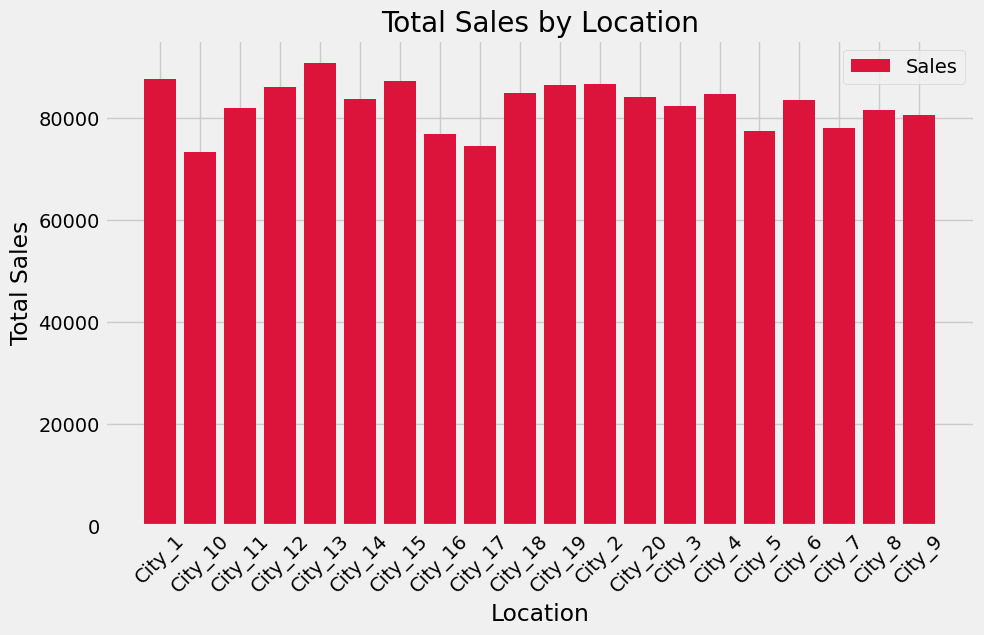

In [56]:
sales_by_location = df.groupby('Location')['TotalPrice'].sum().astype(int)

plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 6))

plt.bar(sales_by_location.index, sales_by_location.values,color = 'crimson' ,linewidth =1.5,label = 'Sales')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.title('Total Sales by Location')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

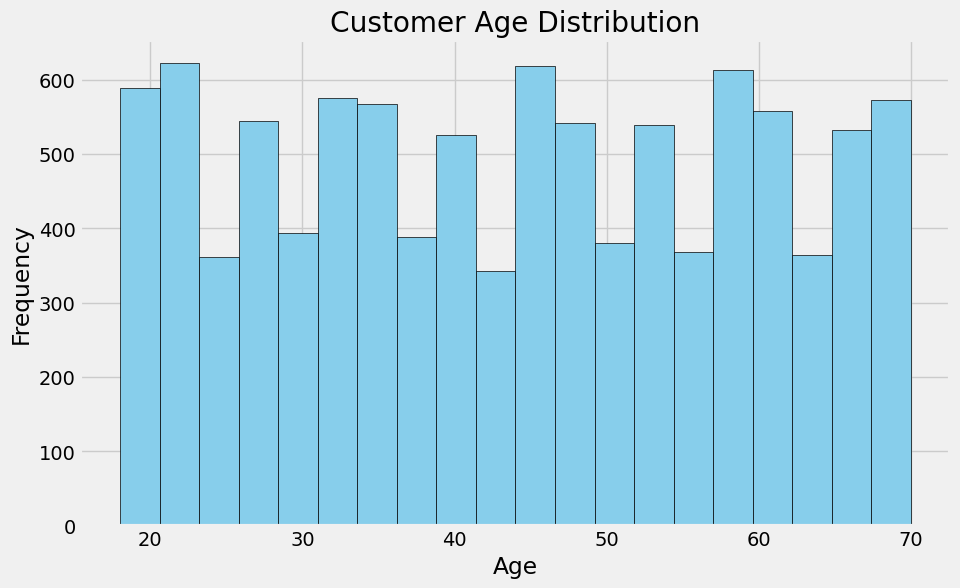

In [57]:
# Customer age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customer Age Distribution')
plt

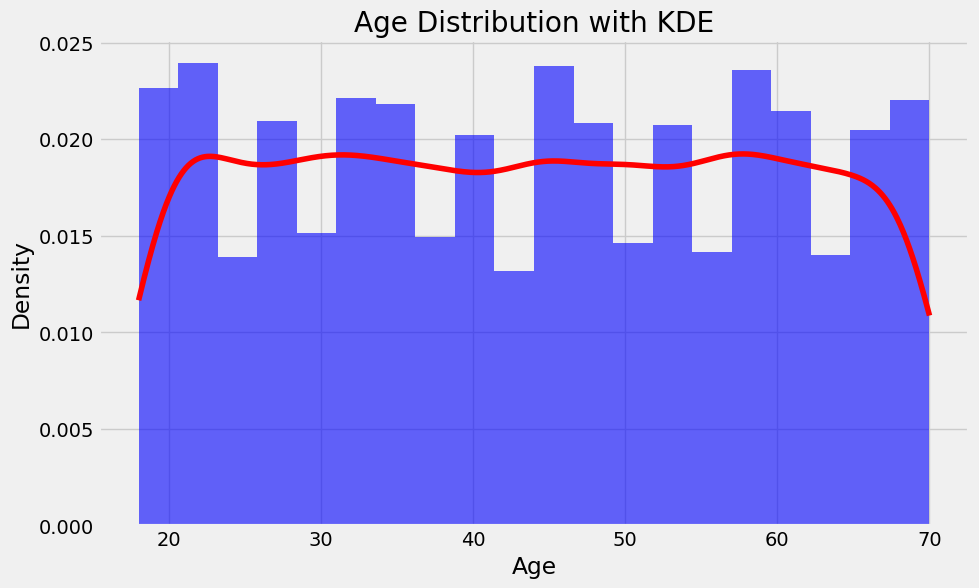

In [58]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(df['Age'], bins=20, density=True, color='blue', alpha=0.6, label='Histogram')

# Calculate KDE
kde = gaussian_kde(df['Age'])
x_values = np.linspace(min(df['Age']), max(df['Age']), 1000)  # Create x-values for the KDE curve
plt.plot(x_values, kde(x_values), color='red', label='KDE')  # Plot KDE


# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution with KDE')
#plt.legend()

# Show the plot
plt.show()

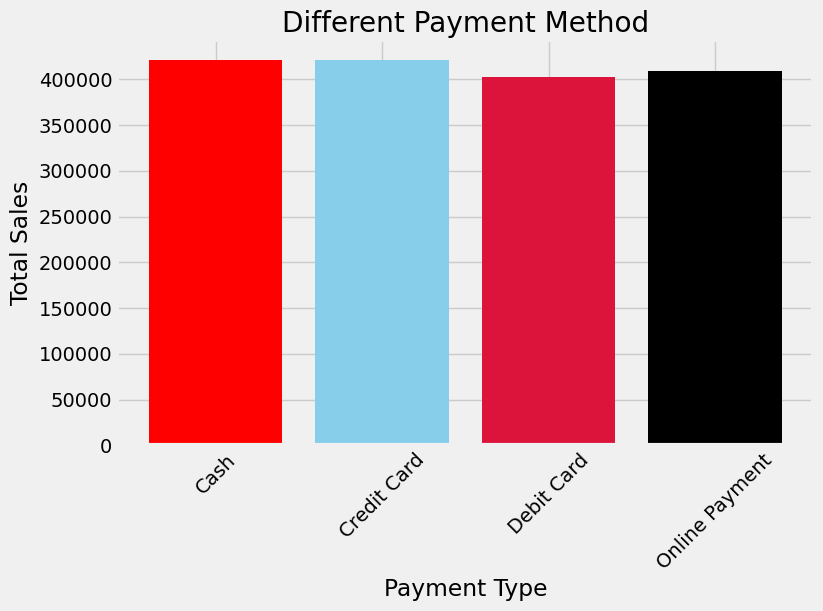

In [59]:
# sales by payment type
sales_by_payment_type = df.groupby('PaymentType')['TotalPrice'].sum().astype(int)

plt.figure(figsize = (8,5))
color = ['red','skyblue','crimson', 'black']
plt.bar(sales_by_payment_type.index,sales_by_payment_type.values,color = color,linewidth = 2)
plt.xlabel('Payment Type')
plt.ylabel('Total Sales')
plt.title('Different Payment Method')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

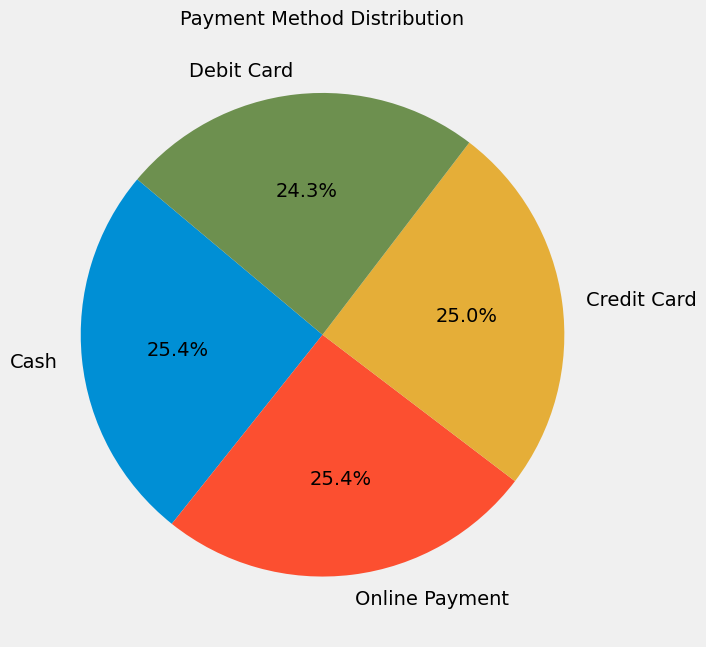

In [60]:
# Payment Method Distribution Pie Chart
payment_distribution = df['PaymentType'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution', fontsize=14)
plt.tight_layout()
plt.show()